In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
experiment_dir = "/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/run/results/2021-01-18-19-11-42"

In [3]:
readout_dirs = os.listdir(experiment_dir)

readout_dirs_fixed = [
    'readout_0.0',
    'readout_0.2',
    'readout_0.4',
    'readout_0.6',
    'readout_0.8',
    'readout_1.0'
]

In [4]:
dfs = {float(readout_dir.split("_")[1]): pd.read_csv(os.path.join(experiment_dir, readout_dir, "0", "network_log.csv")) for readout_dir in readout_dirs_fixed}

In [5]:
student_weight_paths = {float(readout_dir.split("_")[1]): {i: os.path.join(experiment_dir, readout_dir, "0", f"student_weights_{i}") for i in np.arange(0, 2995000, 5000)} for readout_dir in readout_dirs_fixed}

In [6]:
student_weights = {k: {i: torch.load(w, map_location=torch.device('cpu')) for i, w in v.items()} for k, v in student_weight_paths.items()}

In [17]:
def feature_weight_diff_mse(weights0, weights1):
    feature_weights0 = weights0["_layers.0.weight"].numpy()
    feature_weights1 = weights1["_layers.0.weight"].numpy()
    diffs = np.sum((feature_weights1 - feature_weights0) ** 2) / np.sum(feature_weights0 ** 2)
    return diffs

def by_neuron_feature_weight_diff_mse(weights0, weights1):
    feature_weights0 = weights0["_layers.0.weight"].numpy()
    feature_weights1 = weights1["_layers.0.weight"].numpy()
    
    neuron_diffs = []
    
    for i, neuron in enumerate(feature_weights0):
        neuron_diff = np.mean((feature_weights0[i] - feature_weights1[i]) ** 2)
        neuron_diffs.append(neuron_diff)
    return neuron_diffs
    

In [10]:
sw = student_weights[0.0]

In [16]:
sw[0.0]["_layers.0.weight"].numpy().shape

(1000, 15)

In [27]:
data = []

for i in np.arange(0, 2995000, 5000):
    swi = sw[i]
    
    swi_diffs = by_neuron_feature_weight_diff_mse(weights0=sw[0], weights1=swi)

    feature = swi["_layers.0.weight"].numpy()
    head_0 = swi["_heads.0.weight"].numpy().T.flatten()
    head_1 = swi["_heads.1.weight"].numpy().T.flatten()
    
    t_data = []
    
    for i, neuron in enumerate(feature):
        head_mag = np.absolute(head_1[i])
        y_i = swi_diffs[i]
        
        t_data.append((y_i, head_mag))
    
    data.append(t_data)

In [32]:
x_data = [[t[i][0] for t in data] for i in range(len(data[0]))]
y_data = [[t[i][1] for t in data] for i in range(len(data[0]))]

<ipython-input-35-b2e992ac739d>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


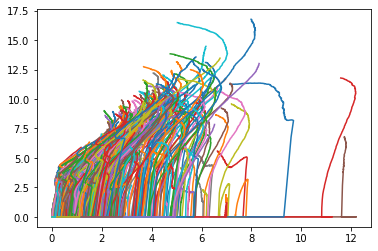

In [35]:
fig = plt.figure()
for x_d, y_d in zip(x_data, y_data):
    plt.plot(x_d, y_d)
fig.show()

In [63]:
def magnitude_observation(later_step, readout, switch_step = 1500000, absolute=True):
    sw = student_weights[readout]
    
    head_0_at_switch = sw[switch_step]["_heads.0.weight"].numpy().T.flatten()
    if absolute:
        head_0_at_switch = np.absolute(head_0_at_switch)

    feature_weights_at_switch = sw[switch_step]["_layers.0.weight"].numpy()
    feature_weights_at_later = sw[later_step]["_layers.0.weight"].numpy()

    feature_neuron_diffs = by_neuron_feature_weight_diff_mse(sw[switch_step], sw[later_step])
    
    fig = plt.figure()
    plt.scatter(head_0_at_switch, feature_neuron_diffs)
    plt.ylabel("Feature Neuron Difference")
    plt.xlabel("Neuron Magnitude on First Task at Switch")
    fig.show()

<ipython-input-63-576ef77d1c4b>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


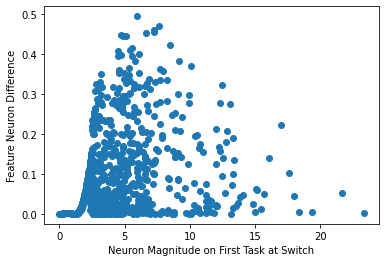

In [64]:
magnitude_observation(1505000, 0.0)

<ipython-input-63-576ef77d1c4b>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


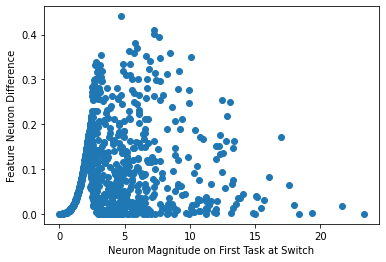

In [65]:
magnitude_observation(1505000, 0.2)

<ipython-input-63-576ef77d1c4b>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


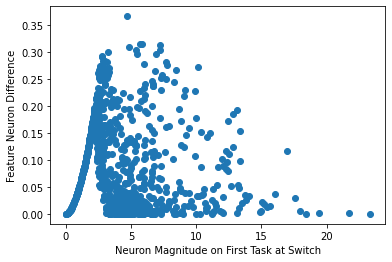

In [66]:
magnitude_observation(1505000, 0.4)

<ipython-input-63-576ef77d1c4b>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


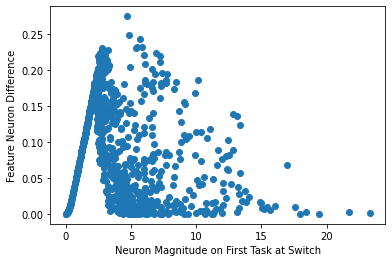

In [67]:
magnitude_observation(1505000, 0.6)

<ipython-input-63-576ef77d1c4b>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


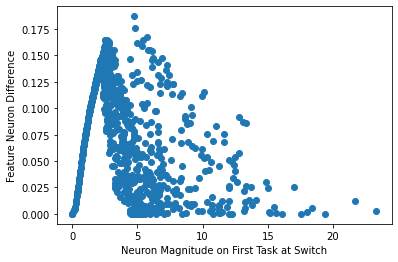

In [68]:
magnitude_observation(1505000, 0.8)

<ipython-input-63-576ef77d1c4b>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


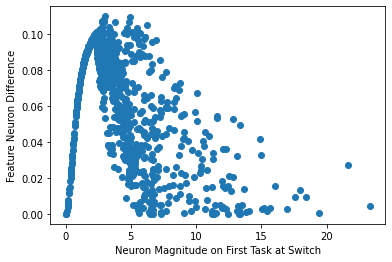

In [69]:
magnitude_observation(1505000, 1.0)

In [100]:
def magnitude_observation_all_readouts(later_step, readouts, switch_step = 1500000, absolute=True):
    fig = plt.figure(figsize=(10, 7))
    for readout in readouts:
        sw = student_weights[readout]

        head_0_at_switch = sw[switch_step]["_heads.0.weight"].numpy().T.flatten()
        if absolute:
            import pdb; pdb.set_trace()
            head_0_at_switch = np.absolute(head_0_at_switch)

        feature_weights_at_switch = sw[switch_step]["_layers.0.weight"].numpy()
        feature_weights_at_later = sw[later_step]["_layers.0.weight"].numpy()
        
        switchs.append(feature_weights_at_switch)

        feature_neuron_diffs = by_neuron_feature_weight_diff_mse(sw[switch_step], sw[later_step])

        plt.scatter(head_0_at_switch, feature_neuron_diffs, label=f"Readout Similarity: {readout}", alpha=0.6)
    plt.ylabel("Feature Neuron Difference (MSD)")
    plt.xlabel("Neuron Magnitude on First Task at Switch")
    plt.title(f"{later_step - switch_step} Steps Post-switch")
    plt.legend()
    fig.show()
    fig.savefig(os.path.join("/Users/sebastianlee/Desktop", f"{later_step - switch_step}_steps.pdf"), dpi=100)

In [ ]:
magnitude_observation_all_readouts(1505000, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

> <ipython-input-100-035f098239c6>(9)magnitude_observation_all_readouts()
      7         if absolute:
      8             import pdb; pdb.set_trace()
----> 9             head_0_at_switch = np.absolute(head_0_at_switch)
     10 
     11         feature_weights_at_switch = sw[switch_step]["_layers.0.weight"].numpy()



ipdb>  head_0_at_switch


array([ 5.06165934e+00,  1.12710037e+01,  8.85264969e+00, -1.82524884e+00,
        1.00299525e+00,  2.70281744e+00,  6.35340881e+00,  2.60513663e+00,
        2.49996376e+00, -2.41145802e+00, -2.52464604e+00, -1.88966656e+00,
       -9.66707051e-01,  7.27202940e+00, -2.04343939e+00,  2.32783103e+00,
        3.96169758e+00, -2.85848331e+00,  2.16563249e+00,  2.26629615e+00,
       -1.37014568e+00, -4.87496471e+00, -3.25613260e+00, -6.20763302e-01,
       -3.90034127e+00,  5.62371540e+00, -2.06336260e+00,  2.99850893e+00,
       -3.42231297e+00, -5.10242605e+00, -5.27430487e+00,  1.13903880e+00,
        2.44821668e+00, -2.38503528e+00, -2.30202723e+00,  2.39035821e+00,
       -2.71533990e+00,  1.90954185e+00, -2.26330161e+00,  2.19046068e+00,
        2.75800514e+00,  3.31821918e+00,  1.93974400e+00,  3.02149844e+00,
       -5.20028830e+00,  2.71785951e+00,  9.72685337e+00,  4.06476784e+00,
        4.24251944e-01, -4.79864836e+00, -1.38567519e+00, -2.35479832e+00,
        7.89692640e-01, -

<ipython-input-95-5a21d1b5694e>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


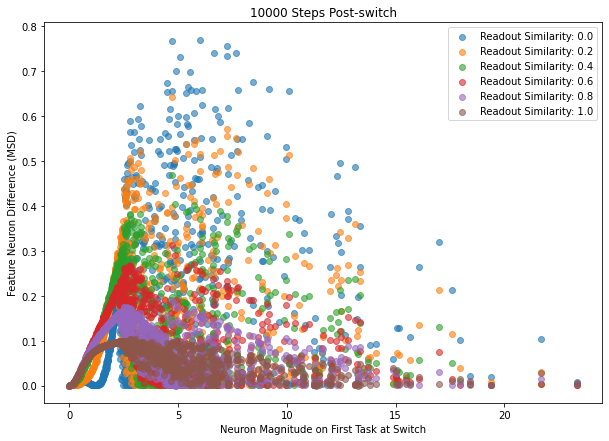

In [97]:
magnitude_observation_all_readouts(1510000, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

<ipython-input-95-5a21d1b5694e>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


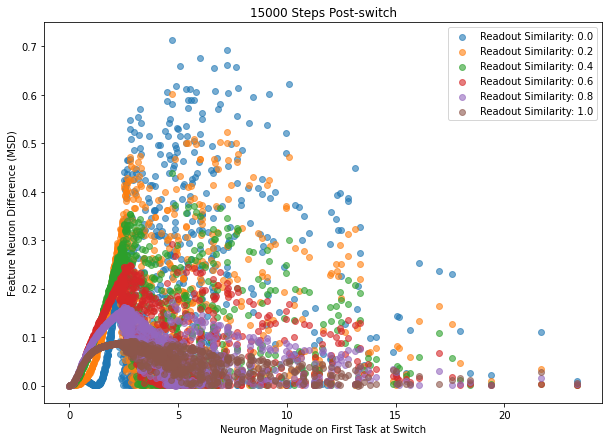

In [98]:
magnitude_observation_all_readouts(1515000, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

<ipython-input-77-22650cfc9dbf>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


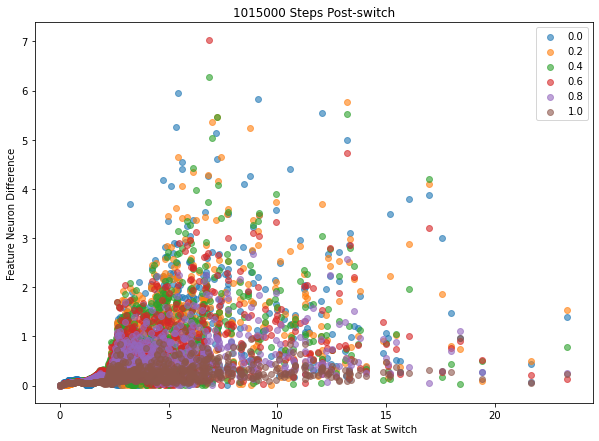

In [81]:
magnitude_observation_all_readouts(2515000, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])